# Convolutional Neural Network Aplied to MNIST DataSet
I have made this project for practising CNN fundamentals and TensorFlow. It's the first Deep Learning model that I made 100% by myself.


In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from time import time

In [2]:
#First of all, load the data:
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.mnist.load_data()

In [64]:
text = "The dimension of the images are:\n\tX_train = {}\n\tY_train = {}\n\tX_test = {}\n\tY_test = {}\n"
print( text.format(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)) 

The dimension of the images are:
	X_train = (60000, 28, 28, 1)
	Y_train = (60000,)
	X_test = (10000, 28, 28, 1)
	Y_test = (10000,)



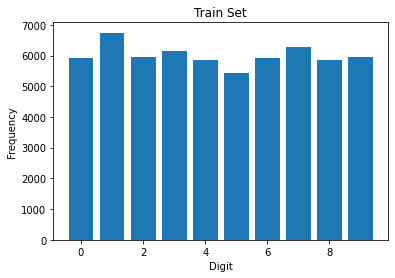

In [65]:
#Now we are going to visualize how well distribuited is our data:
freq = list()
for i in range(10):
    #We are counting the frequency of every digit
    freq.append( (Y_train == i).sum() )
#We make the plot on a histogram:
plt.bar(range(10), freq)
plt.xlabel("Digit")
plt.ylabel("Frequency")
plt.title("Train Set")
plt.show()

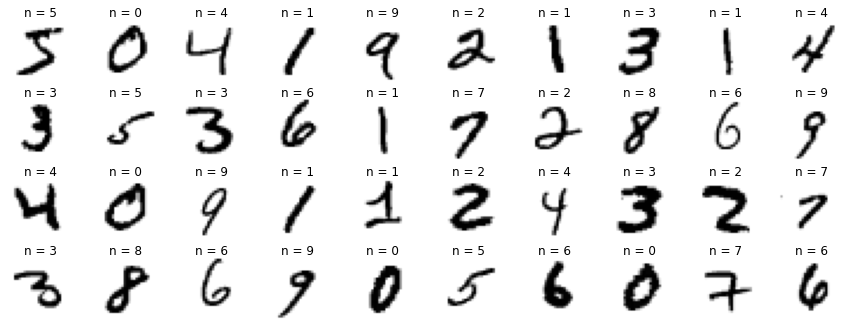

In [66]:
#We are  going to plot some images from MNIST dataset:
plt.figure(figsize=(15,6))
for i in range(40):  
    plt.subplot(4, 10, i+1)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.title("n = " + str(Y_train[i]),y=0.9)
    plt.axis('off')
plt.subplots_adjust(wspace=0.3, hspace=-0.1)
plt.show()

The output layer of our model is going to be a 10 neurons softmax layer so we need to transform our y dataset using one-hot encoding:

* Y: (m, 1) -----------> (m, 10)

For example:

  3 ---> [0,0,0,1,0,0,0,0,0,0]
  
  0 ---> [1,0,0,0,0,0,0,0,0,0]
    
  


In [67]:
#I am going to use the function tf.one_hot

y_train = np.array(tf.one_hot(Y_train, 10))
y_test  = np.array(tf.one_hot(Y_test, 10))
#We are going to check if has worked:
print("One hot encoding check:")
for i in range(5):
    print(Y_train[i], '->', y_train[i]) 

m_train = X_train.shape[0]
m_test  = X_test.shape[0]
n = X_train.shape[1]

X_train = X_train.reshape((m_train, n, n, 1))
X_test  = X_test.reshape((m_test, n, n, 1))

texto = "\nNow shape have changed:\n\tX_train = {}\n\ty_train = {}\n\tX_test = {}\n\ty_test = {}\n"
print( texto.format(X_train.shape, y_train.shape, X_test.shape, y_test.shape) )

One hot encoding check:
5 -> [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
0 -> [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
4 -> [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
1 -> [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
9 -> [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]

Now shape have changed:
	X_train = (60000, 28, 28, 1)
	y_train = (60000, 10)
	X_test = (10000, 28, 28, 1)
	y_test = (10000, 10)



Finally we are going to normalize input data, our goal is: X belonging to [-1, 1]

In [68]:
def normalizer(X):
    #I'm going to use a linear function to transform our max value 1 and our min -1
    max_value = X.max()
    min_value = X.min()
    
    a = 2/(max_value - min_value)
    b = 1 - a * max_value
    
    return( a*X+b )


#Normalizing:

X_train = normalizer(X_train)
X_test  = normalizer(X_test)

print('max: {}\nmin: {}'.format(X_train.max(), X_train.min()))

max: 1.0
min: -1.0


# Convolutional NN
La red tendrá 2 partes, una primera convolucional y una segunda de clasificación.

Utilizaremos un padding=2 y filtros de 5x5. Tras cada convolución aplicaremos pooling 2x2 para reducir el tamaño de los tensores.
Para la segunda parte de la red, reutilizaremos el código de la red profunda.



In [8]:
#Now I'm going to implement the model structure:
model = models.Sequential()
#Convolutional layers:
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
#Fully-connected layers:
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax')) #OUTPUT LAYER

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                102464    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                6

In [9]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
#I'm saving the weights so if we need to re-train the NN we can do a backup:
initial_weights = model.get_weights()

history = model.fit(X_train, y_train, epochs=10,
                   validation_data=(X_test, y_test))

2022-05-18 21:04:46.953621: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-05-18 21:04:46.971570: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2095980000 Hz


Epoch 1/5
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1366 - accuracy: 0.9596 - val_loss: 0.0482 - val_accuracy: 0.9852
Epoch 2/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0426 - accuracy: 0.9866 - val_loss: 0.0361 - val_accuracy: 0.9882
Epoch 3/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0295 - accuracy: 0.9902 - val_loss: 0.0342 - val_accuracy: 0.9891
Epoch 4/5
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0220 - accuracy: 0.9931 - val_loss: 0.0315 - val_accuracy: 0.9908
Epoch 5/5
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0168 - accuracy: 0.9947 - val_loss: 0.0324 - val_accuracy: 0.9902


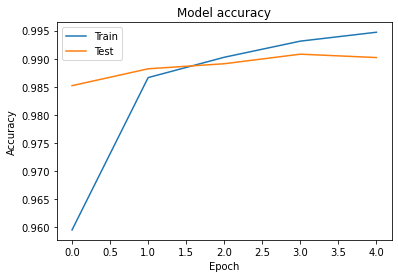

In [10]:
#We are going to plot the accuracy after every epoch
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model accuracy')

plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

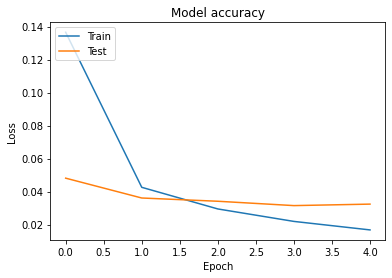

In [11]:
#We are going to plot the accuracy after every epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model accuracy')

plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

We can obtain the conclussion that after 2 epochs training the test accuracy and the test loss doesn't improve so we possibly are **overfitting the model**.

So we are going to train the model only 2 epochs.

# Re Training
Now that we have that information about the model's perform I'm going to re train the model using only 2 epochs of training.

In [12]:
#We are restarting our model:
model.set_weights(initial_weights)
#And re-training:
history = model.fit(X_train, y_train, epochs=2,
                   validation_data=(X_test, y_test))


Epoch 1/2
1875/1875 [==============================] - 22s 12ms/step - loss: 0.1035 - accuracy: 0.9674 - val_loss: 0.0354 - val_accuracy: 0.9883
Epoch 2/2
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0355 - accuracy: 0.9891 - val_loss: 0.0363 - val_accuracy: 0.9878


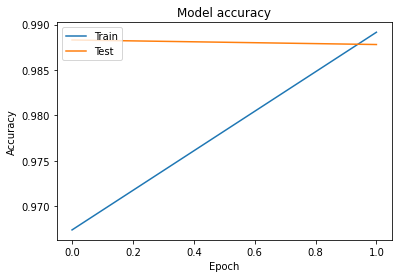

In [13]:
#We are going to plot the accuracy after every epoch
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model accuracy')

plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

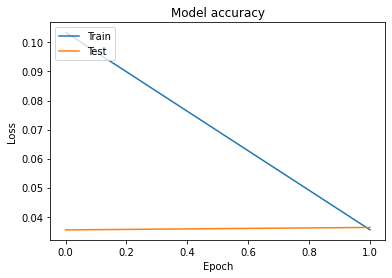

In [14]:
#We are going to plot the accuracy after every epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model accuracy')

plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Stupid aplication
To see the perform of the model I have made a function that shows the prediction of a random image from the test dataset.

In [15]:
#This function draws a single digit
def show_image(image, title, color='black'):
    plt.imshow(image, cmap=plt.cm.binary)
    plt.title( title ).set_color(color)

    plt.show()

In [16]:
#I have implemented an "interactive game" to see the performance of the model
def game(X, y_exp, y_obt):
    m = X.shape[0]
    i = np.random.randint(m)
    
    image = X[i, :]
    exp_result = y_exp[i]
    obt_result = y_obt[i]
    
    if(exp_result == obt_result):
        color = "green"
    else:
        color = "red"
    
    title = 'Model prediction: {}'.format(obt_result)
    
    show_image(image, title, color)

In [17]:
#We only have to make the prediction once:
y_test_pred = model.predict(X_test)
#I'm reversing the one-hot encoding:
i_test_pred = np.argmax(y_test_pred, 1)
i_test = np.argmax(y_test, 1)


Run again this cell to see other expamples! ;)


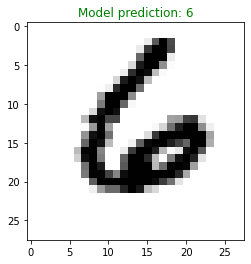

In [82]:
#Run again this cell to check how well works our NN
print('\nRun again this cell to see other expamples! ;)')
game(X_test, i_test, i_test_pred)